<a href="https://colab.research.google.com/github/rakaputra12/Data_Exploration_Diabetes/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# **Read Dataset**

In [ ]:
df_url = "https://raw.githubusercontent.com/rakaputra12/Data_Exploration_Diabetes/main/Healthcare-Diabetes.csv"

diabetes_df = pd.read_csv(df_url)


#Es muss auch auf Gitlab oder Github verlangert werden, es macht keinen Sinn dass der Dozent auf meinen Drive zugreift!!!!! ERLEDIGT
#Bitte auch die Code in Gitlab oder Github ablegen!!! für die Reproduzierbarkeit, auch für den Dozent ERLEDIGT

In [67]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
#Delete the column "Id"
diabetes_df = diabetes_df.drop('Id', axis=1)

# **Explore Data Analysis**

In [68]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [69]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [70]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [71]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [72]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2763,False,False,False,False,False,False,False,False,False
2764,False,False,False,False,False,False,False,False,False
2765,False,False,False,False,False,False,False,False,False
2766,False,False,False,False,False,False,False,False,False


In [73]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

On these columns, a value of zero does not make sense and thus indicates missing value

Following columns or variables have an invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI: it is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values.

In [74]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

#Showing the Count of NaNs
print(diabetes_df_copy.isnull().sum())

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


# **Data Visualization**

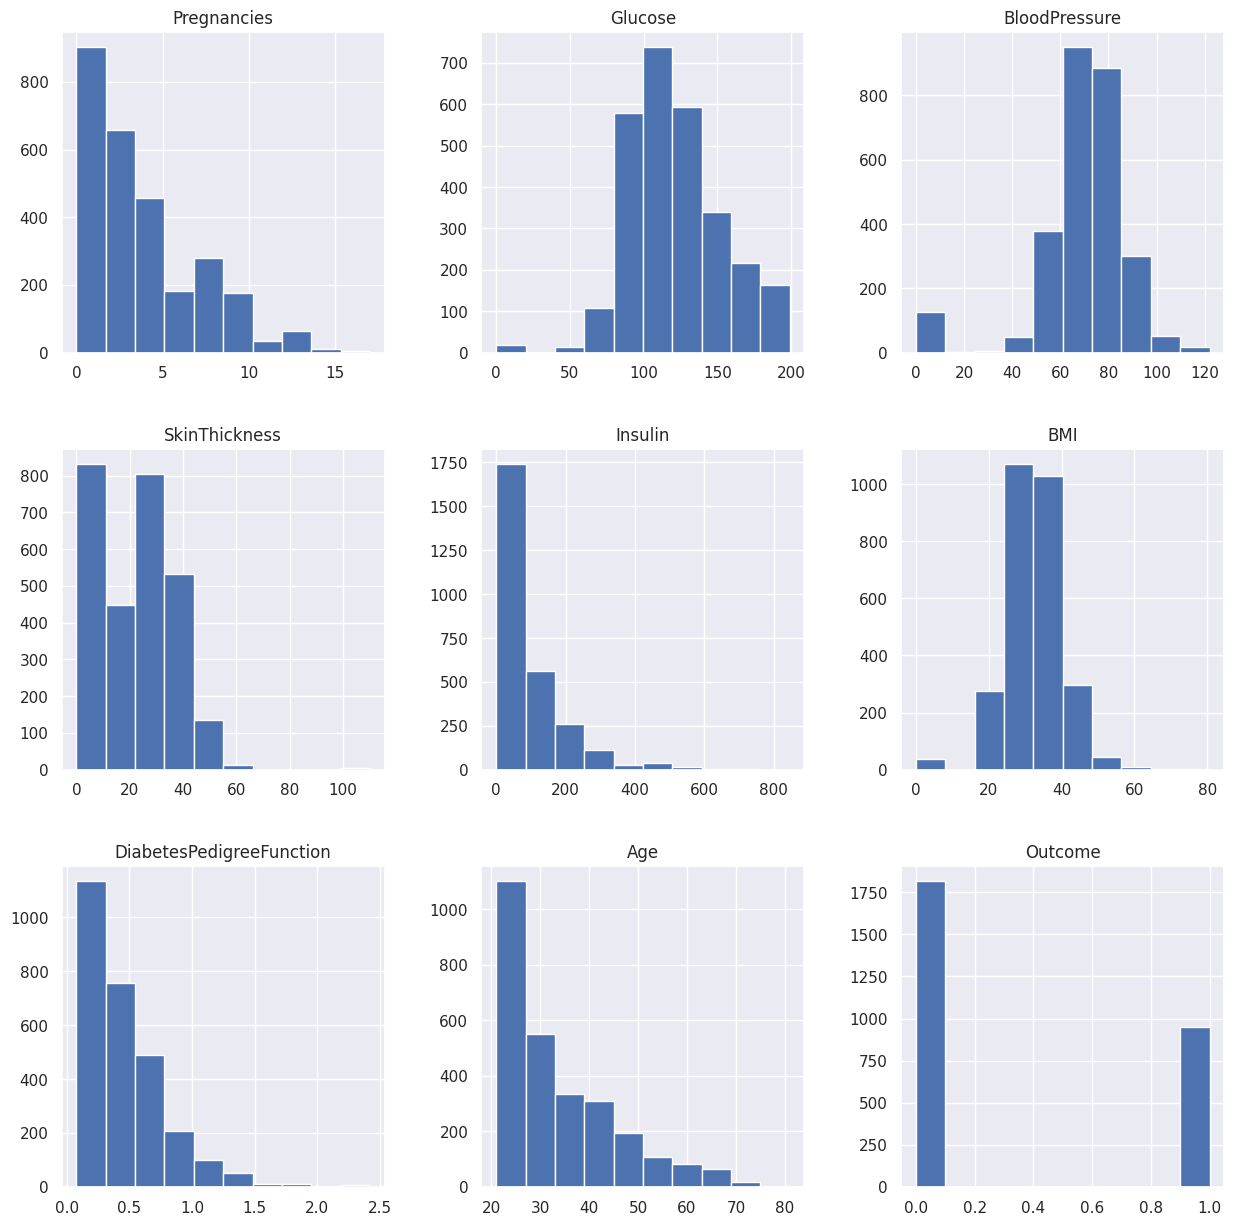

In [79]:
#Plotting the data distribution plots
p = diabetes_df.hist(figsize=(15,15))

In [ ]:
#Aiming to impute NaN values for the columns in accordance with their distribution
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace=True)

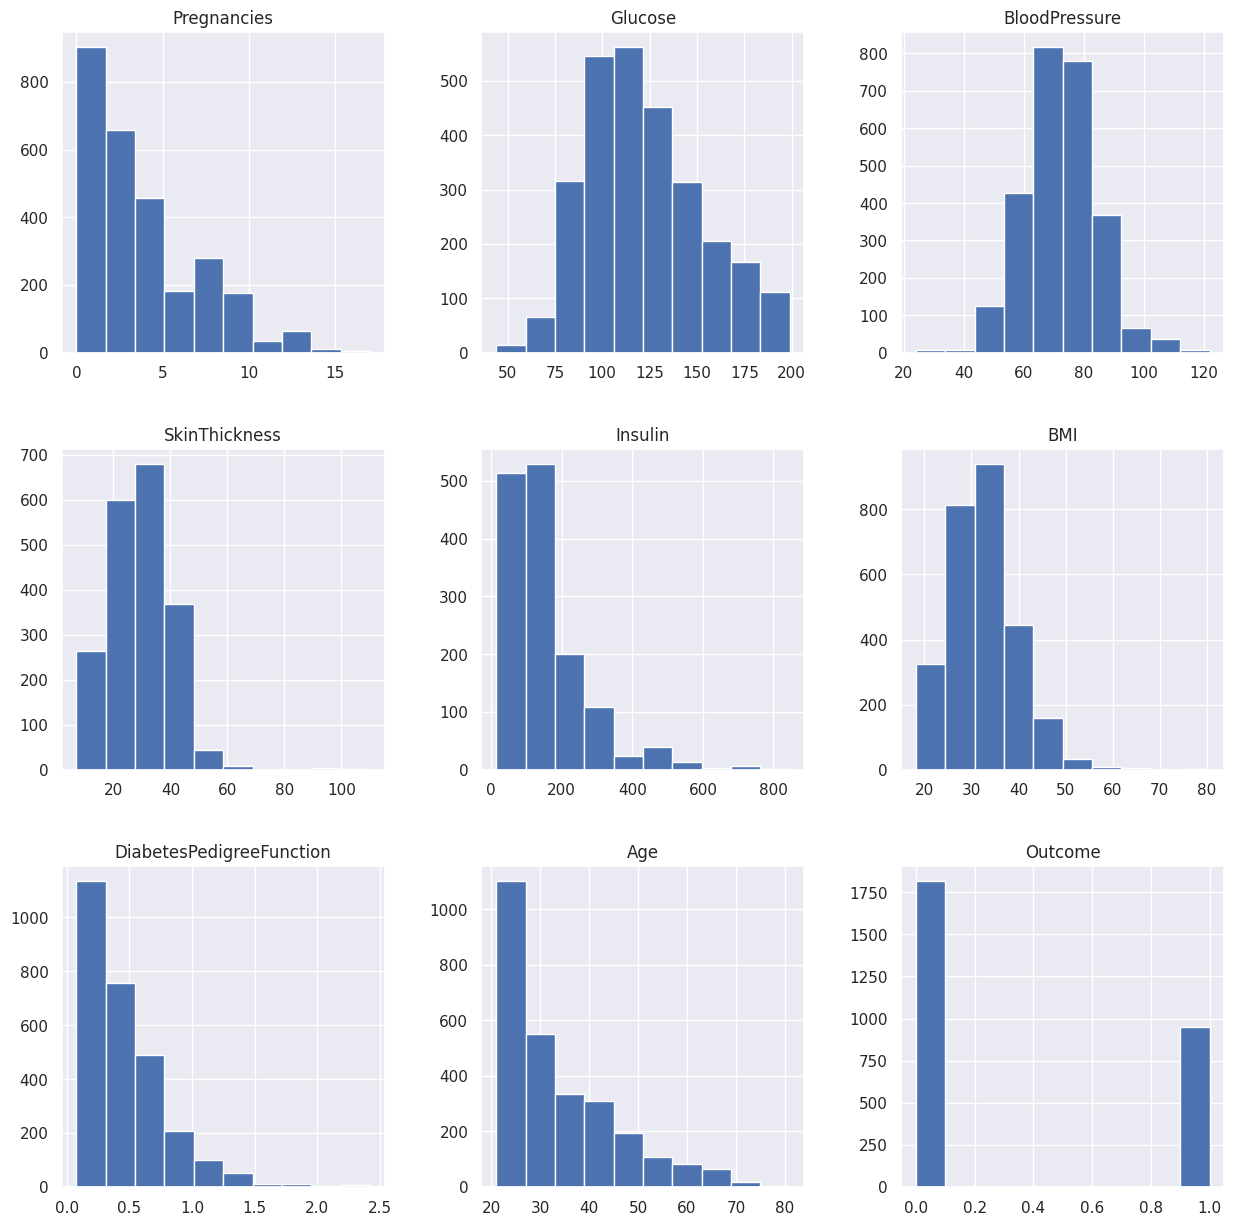

In [80]:
#Plotting the distribution after removing the NaN Values
p = diabetes_df_copy.hist(figsize=(15,15))

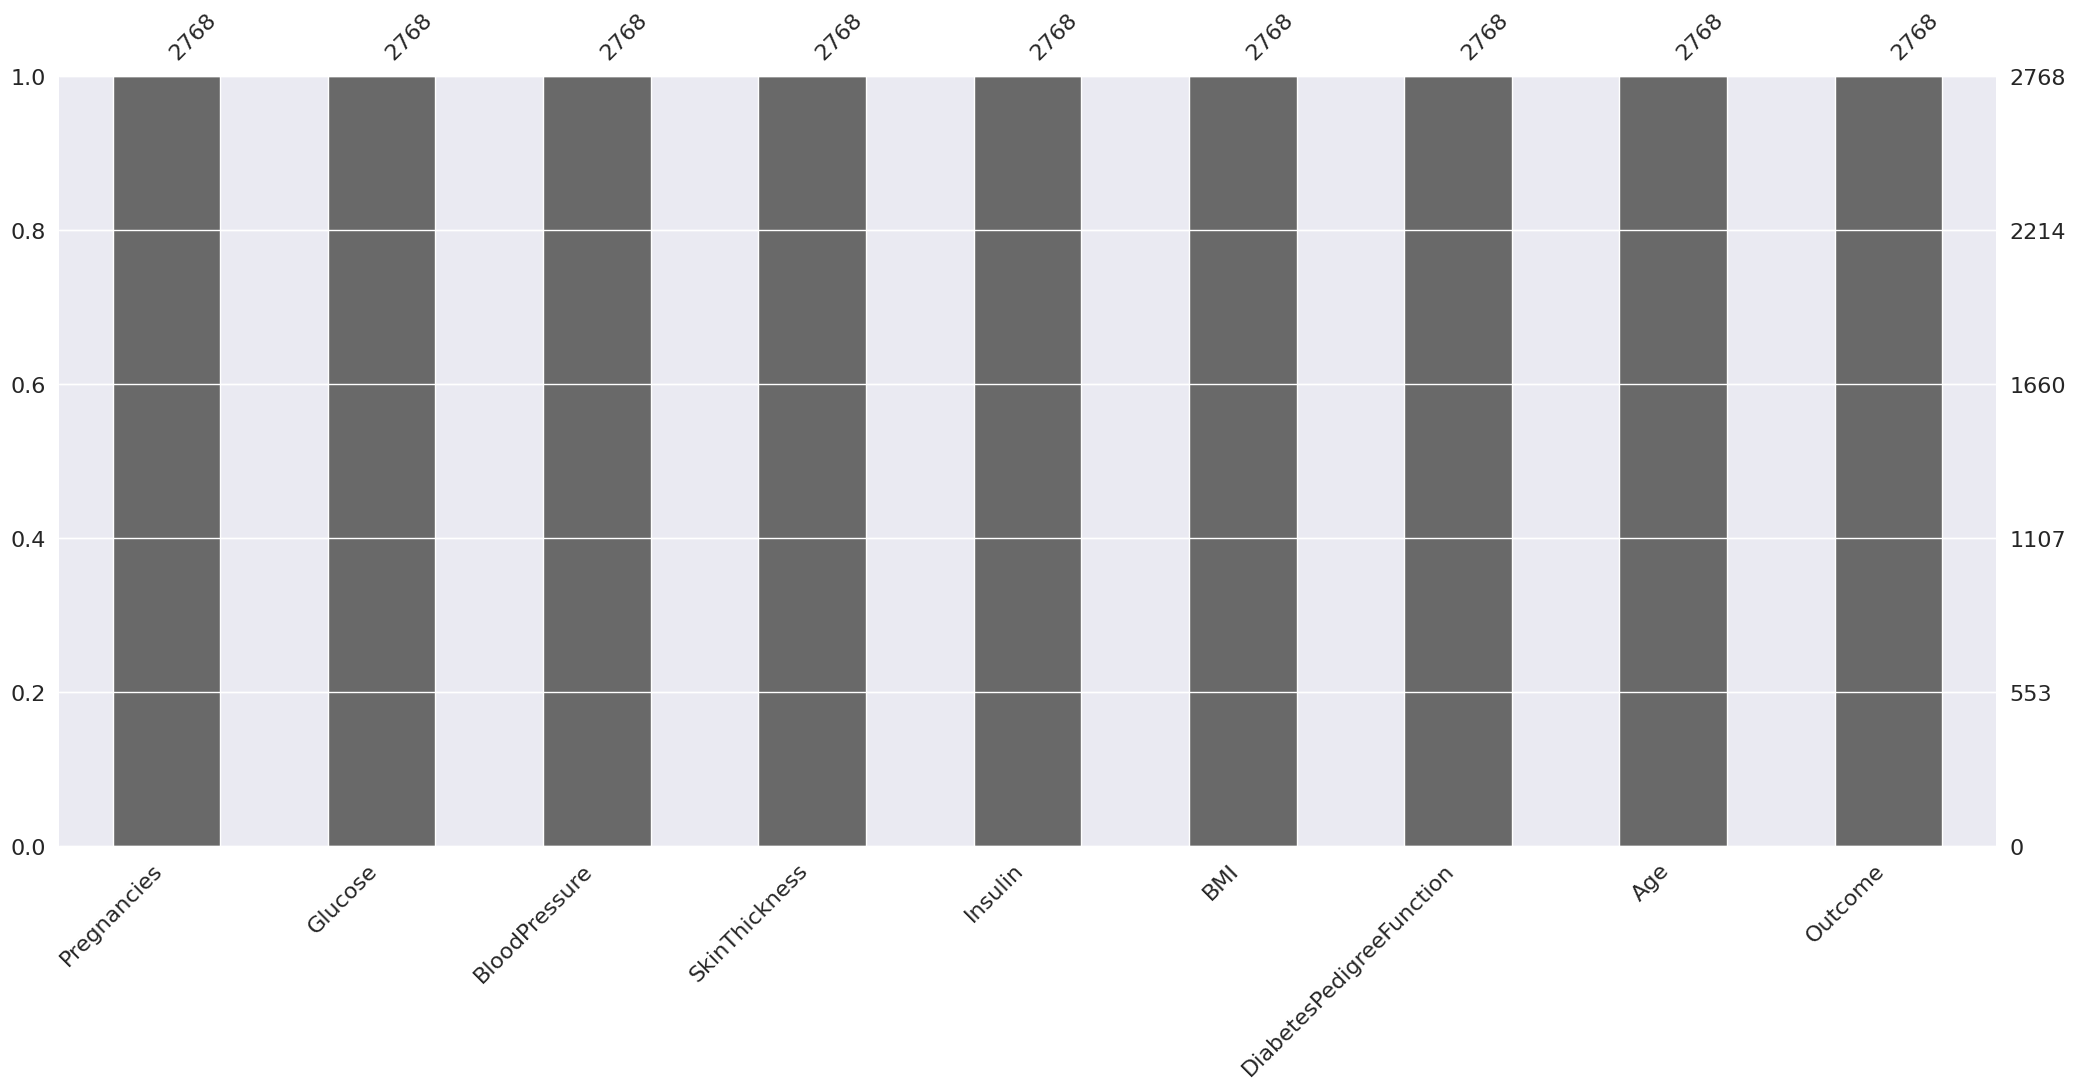

In [81]:
#Plotting Null Count Analysis Plot
p = msno.bar(diabetes_df)

0    1816
1     952
Name: Outcome, dtype: int64


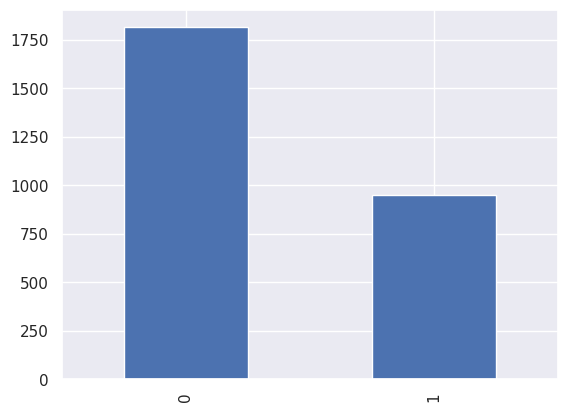

In [82]:
#Checking the balance of the data by plotting the count of outcomes by their values
color_wheel = {1: '#0392cf', 2: '#7bc043'}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.

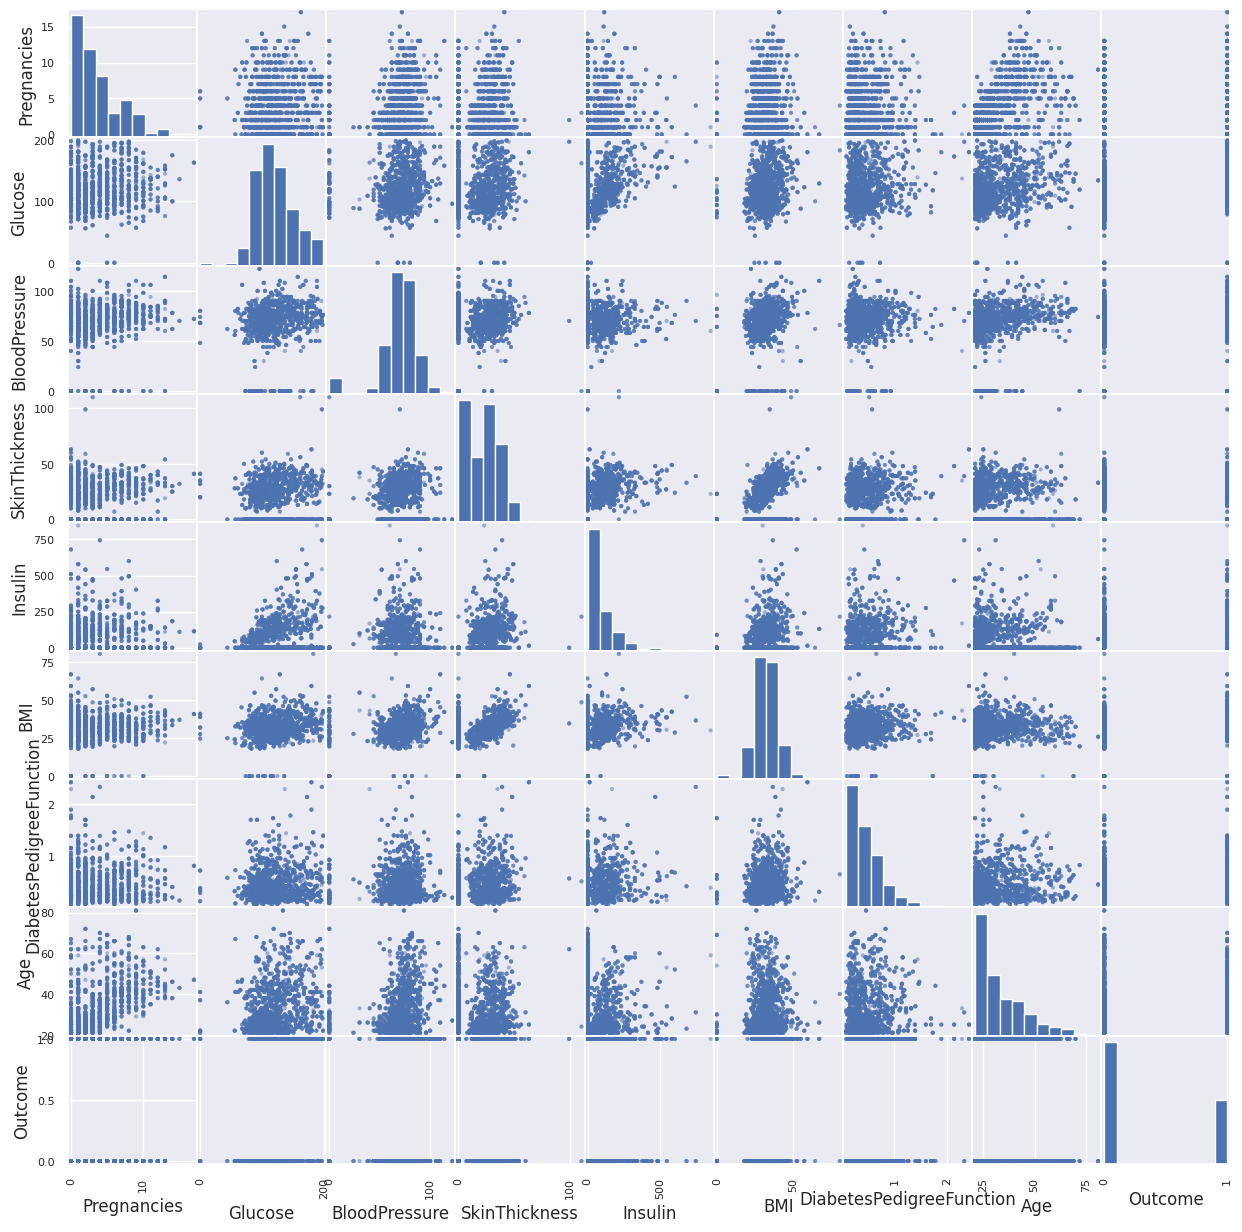

In [84]:
#Plotting a Scatter matrix of uncleaned data
p = scatter_matrix(diabetes_df, figsize=(15,15))

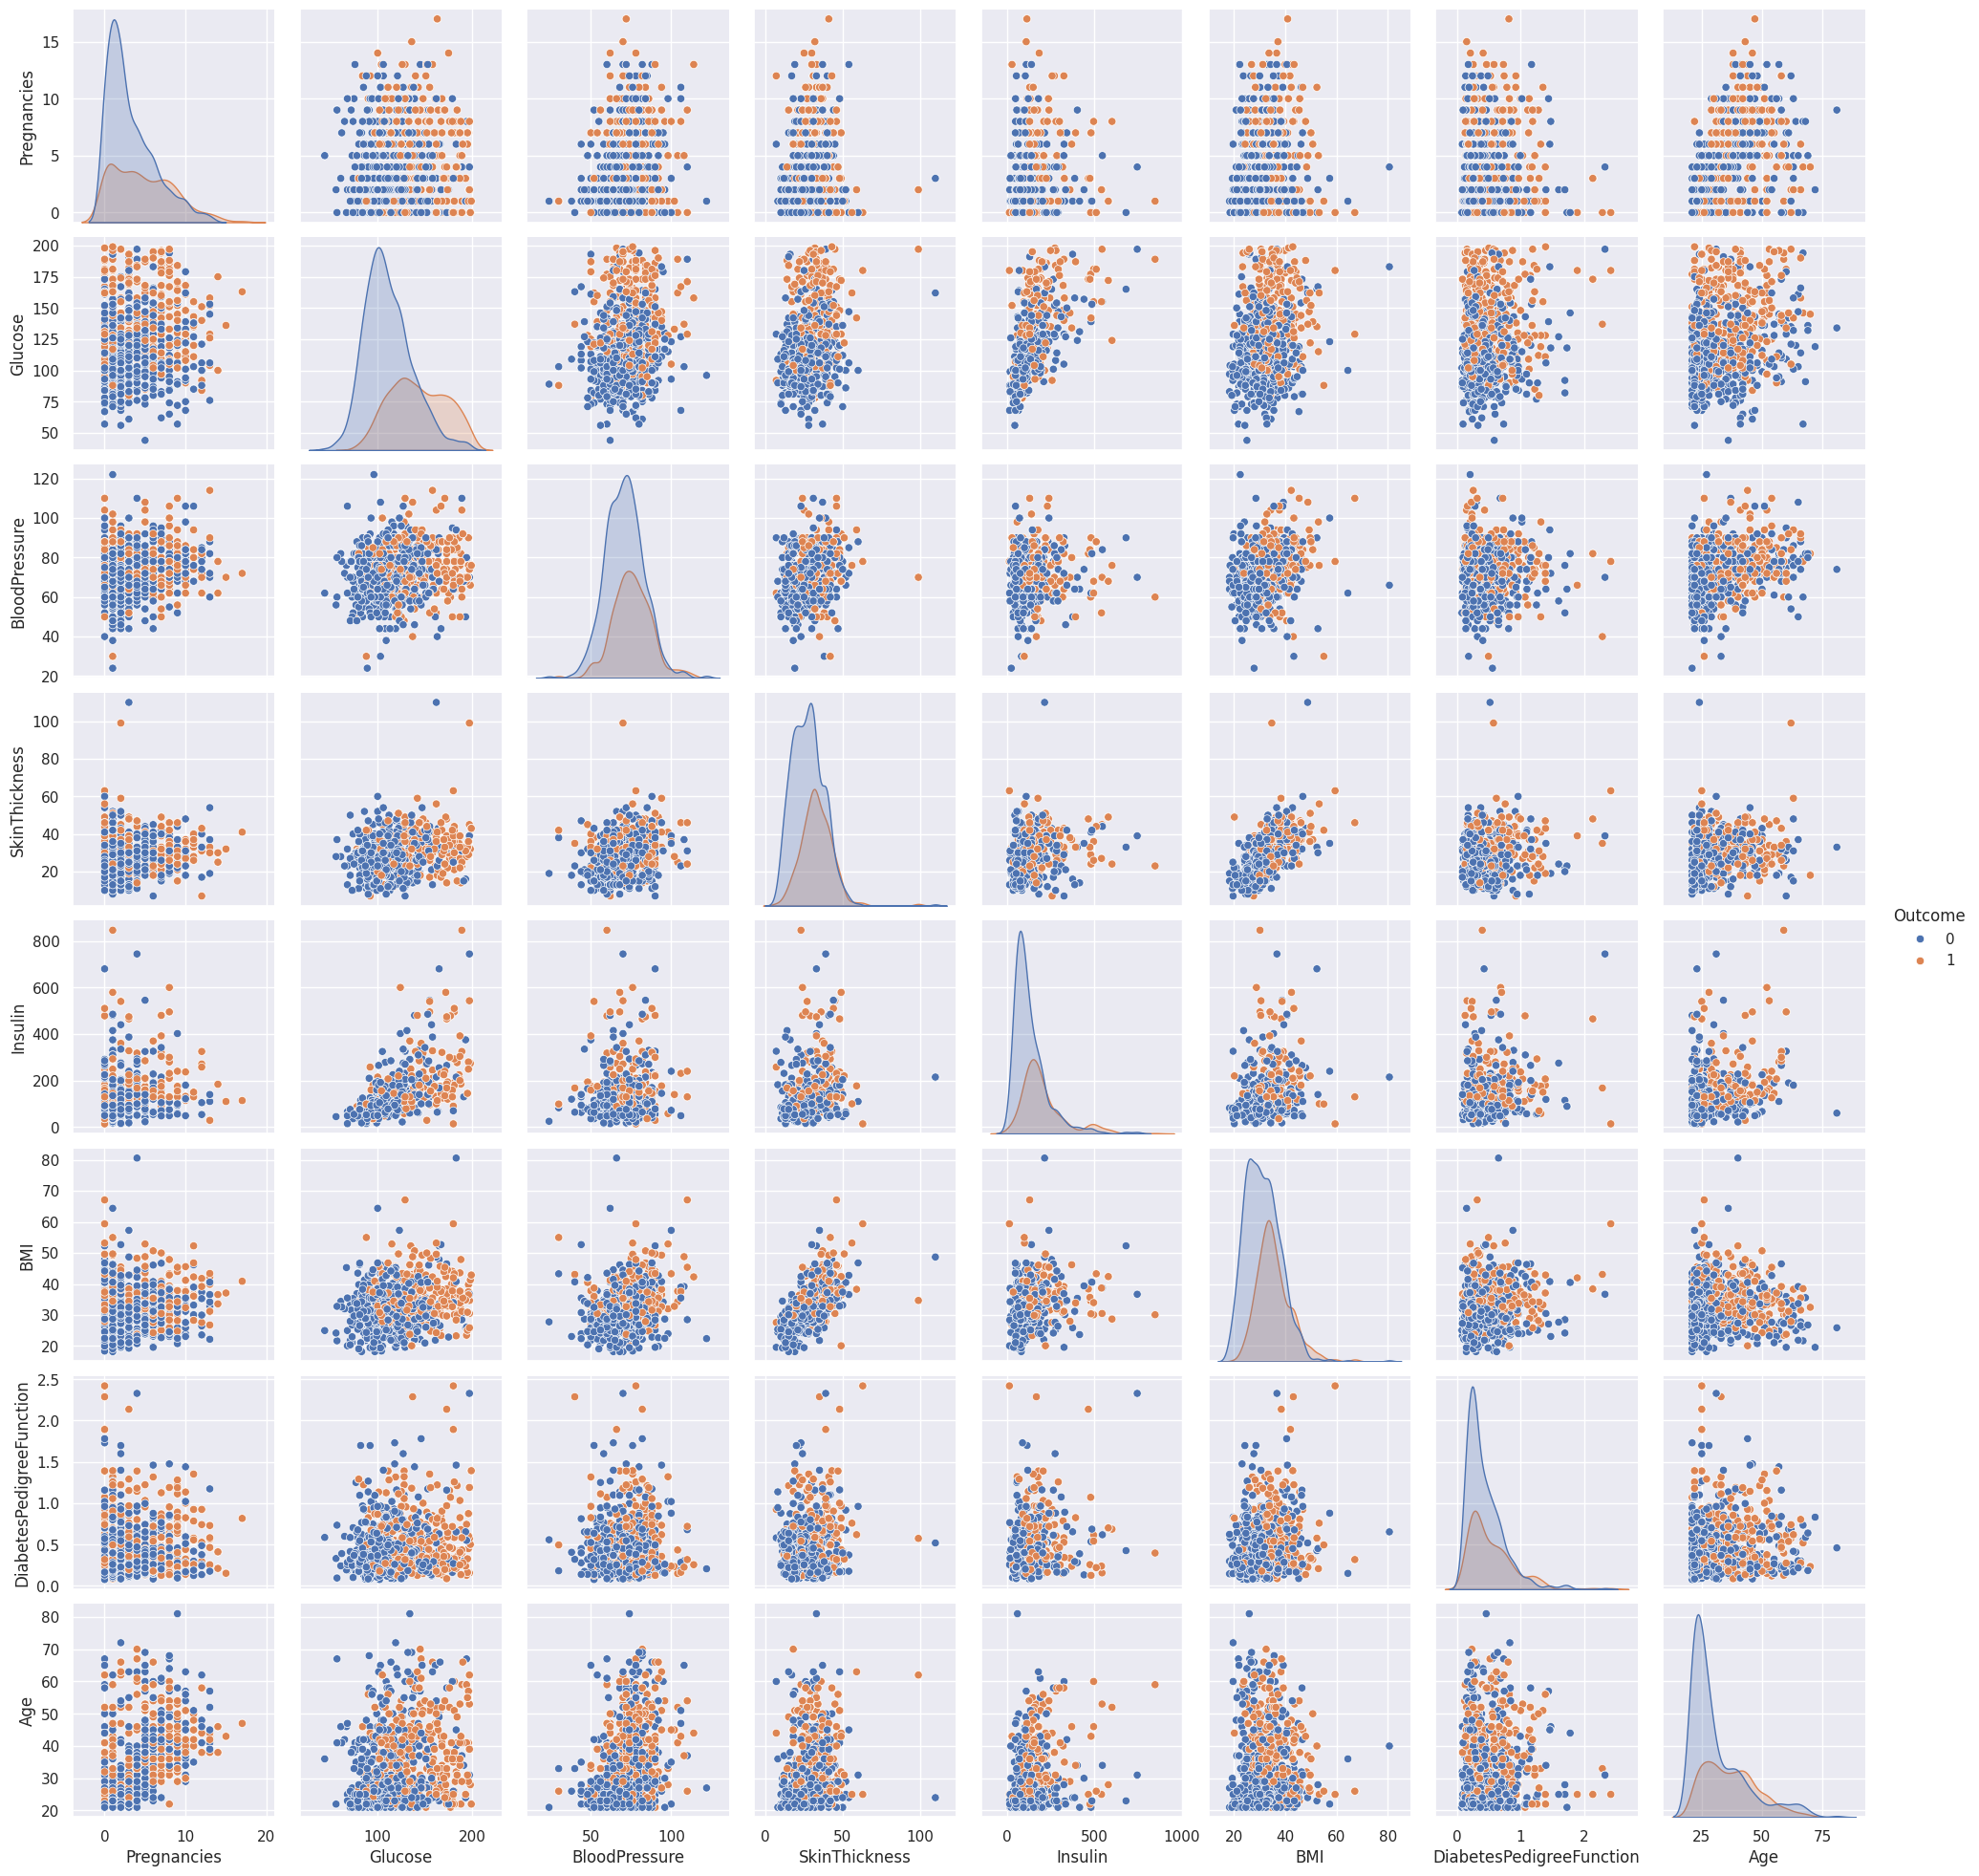

In [85]:
#Plotting the Pair Plots for the data
p = sns.pairplot(diabetes_df_copy, hue= 'Outcome')

# **Use Keras to Build Machine Learning Model???**

In [ ]:
import keras
print(keras.__version__)

3.0.5


In [ ]:
!git version

git version 2.34.1


In [ ]:
!echo ".ignoreme" > .gitignore

In [ ]:
IF USE GOOGLE COLAB YOU NEED THAT FOR TUNNEL
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = "2eMIaE6nA3kl4wBKRC2l5fiXQqj_2pbU9j8dNWagQCRKNtMNq"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr=5000, proto="http", bind_tls= True)
print("Mflow Tracking UI:", ngrok_tunnel.public_url)
#pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=0))])


#param_c = [0.001, 0.01, 0.1, 1.0, 5.0, 10.0]
#param_gamma = [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]

#Here with Pipeline
#Wenn gamma nur bis 1 maximal, dann best score 76% with test accuracy 0.762 in report 0.76,
#Wenn bis 10 dann 81% with test accuracy 0.818 in report 0.81 accuracy
#Wenn bis scale dann  0.77

#param_grid = [{'clf__C': param_c,'clf__kernel': ['linear']}, {'clf__C': param_c,'clf__gamma': param_gamma,'clf__kernel': ['rbf']}]
'''
parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 100.0, 1000.0], #[0.001, 0.01, 0.1, 1.0, 100.0]
    'gamma': ['scale', 1.0, 0.1, 0.01, 0.001],
    'kernel' : ['rbf'],
    'degree' : [2, 3, 4]}
'''


parameters = {
    'C': [0.5, 1.0, 10.0, 100.0],
    'gamma': ['scale', 1.0, 0.1, 0.01, 0.001],
    'kernel' : ['rbf','poly', 'sigmoid']}

gs = GridSearchCV(estimator = machine,
                  param_grid=parameters,
                  scoring='accuracy',
                  cv = 10,
                  n_jobs= -1,
                  refit ='accuracy')

# accuracy = f1/f1_micro here in sklearn
gs = gs.fit(X_train, y_train)


# Log parameters and metrics to MLflow
mlflow.log_metric("best_score", gs.best_score_)
# Log the best parameters as a parameter
for key, value in gs.best_params_.items():
    mlflow.log_param(f"best_{key}", value)

# Log the trained model
mlflow.sklearn.log_model(gs.best_estimator_, "svm_model")


#Takes so long!!!!!!!! try randomsearch
